<a href="https://colab.research.google.com/github/dasmiq/cs6120-hw1/blob/main/token_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical Regularities of Language

In this first homework assignment, you will familiarize yourself with some empirical regularities of natural language, Shannon entropy and Zipf's Law.

Read through this Jupyter notebook and fill in the parts marked with `TODO`. When you're ready to submit, print the notebook as a PDF and upload to Gradescope.

## Shannon Entropy

Shannon borrowed the concept of entropy from statistical physics to develop _information theory_, focused on encoding and compressing messages. A few years later, in 1950, he applied information theory to analyze human predictive ability—in other words, the entropy of the human language model. You can read the original article, [Prediction and Entropy of Printed English](https://languagelog.ldc.upenn.edu/myl/Shannon1950.pdf), for more details.

Your first task is to collect data on how predictable different letters are in an English sentence, depending on how much context in a word or sentence you have.

Go to the [Shannon game page](https://www.ccs.neu.edu/home/dasmith/courses/cs6120/shannon/) that we demonstrated in class. We already guessed part of Text 1, so work through Texts 2, 3, and 4.

In [3]:
# TODO: Enter the arrays of numbers of guesses for Texts 2, 3, and 4 here.
Text_2_guess = [6, 10, 16, 3, 1, 2, 12, 27, 9, 7, 27, 25, 3, 9, 11, 1, 6, 7, 24, 27, 24, 20, 6, 1, 11, 3, 1, 2, 21, 6, 23, 7, 12, 26, 11, 11, 26, 19, 27, 26, 8, 18, 10, 20, 8, 1, 8]

Text_3_guess = [5, 4, 27, 18, 14, 1, 5, 1, 22, 5, 8, 23, 14, 11, 3, 1, 1, 1, 2, 1, 17, 20, 1, 1, 1, 26, 1, 2, 4, 1, 8, 2, 1, 1, 1, 25, 2, 4, 1, 1, 1, 19, 2, 25, 3, 1, 4, 1, 7, 1, 3, 2, 9, 5, 2, 21, 2, 27 ,6 ,4 ,1, 1, 1, 1, 4, 1, 1]

Text_4_guess = [3, 16, 4, 9, 1, 8, 23, 1, 27, 2, 2, 1, 1, 1, 1, 4, 3, 25, 3, 2, 1, 3, 1, 1, 2, 3, 8, 5, 8, 3, 19, 2, 26, 2, 15, 3, 1, 1, 1, 10, 2, 15, 23, 2, 9, 8, 6, 3, 1, 5, 9 ,13, 1, 9, 1, 1, 1]

Rearrange the guess data into a two-dimensional array, relating number of characters of context (0, 1, 2, ...) to number of guesses required.

In other words, you might look in cell (2, 1) and read "2" if the number of times it took one guess to get the right letter with two characters of context was 2.

In [4]:
# TODO: Create array of counts of guesses. Print out the array so we can see it.
import numpy as np

datasets = [Text_2_guess, Text_3_guess, Text_4_guess]

# Make a all-zero table
max_len = max(len(d) for d in datasets)
max_guess = 27
counts = np.zeros((max_len, max_guess), dtype=int)

# Calculate values and fill in table
for context in range(max_len):
    for dataset in datasets:
        if context < len(dataset):
            guess = dataset[context]
            if 1 <= guess <= max_guess:
                counts[context, guess-1] += 1  # zero-based index

print("Combined counts array:")
with np.printoptions(threshold=np.inf, linewidth=200):
    print(counts)


Combined counts array:
[[0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 

Now you can compute Shannon's upper and lower bounds on the entropy of your predictive distribution for English. The upper bound, as a function of the number of context characters $N$, is just the Shannon entropy of the distribution of numbers of guesses. In other words, it's the entropy of the original text as &ldquo;reduced&rdquo; by the human encoder to a sequence of numbers of guesses.

$F_N = -\sum_{i=1}^{27} q_i^N \log_2 q_i^N$

where $q_i^N$ is the number of times you took $i$ guesses with $N$ characters of context, i.e., one of the cells in the table you computed. The number of guesses ranges from 1 to 27 since we restrict ourselves to 26 letters plus space. In computing entropy, we define $0 \log 0 = 0$.

In [5]:
# TODO: Compute the upper bound for each amount of context N and print it out.
def shannon_entropy_upper(count_1d):
    count_1d = np.array(count_1d, dtype=float)
    total = count_1d.sum()
    if total == 0:
        return 0.0  # no data means zero entropy
    
    # Probabilities
    probs = count_1d / total

    # Compute entropy and avoid log(0)
    entropy_terms = np.where(probs > 0, -probs * np.log2(probs), 0)

    entropy = entropy_terms.sum()
    return entropy

Shannon derived a lower bound on entropy from the guess data as

$\sum_{i=1}^{27} i(q_i^N - q_{i+1}^N) \log_2 i$

In [6]:
# TODO: Compute thew lower bound for each amount of context N and print it out.
def shannon_lower_bound(q_counts):
    q_counts = np.array(q_counts, dtype=float)

    # Append a zero at the end
    q_extended = np.append(q_counts, 0)

    indices = np.arange(1, 28, dtype=float)

    # Calculate the difference
    diffs = q_extended[:-1] - q_extended[1:]

    # Compute each term
    terms = indices * diffs * np.log2(indices)

    # Sum all terms
    lower_bound = np.sum(terms)
    return lower_bound

In [11]:
print("\nEntropy bounds by context length:")
for N in range(max_len):
    upper = shannon_entropy_upper(counts[N])
    lower = shannon_lower_bound(counts[N])
    print(f"Context length {N}: Upper bound = {upper:.4f}, Lower bound = {lower:.4f}")


Entropy bounds by context length:
Context length 0: Upper bound = 1.5850, Lower bound = 10.2647
Context length 1: Upper bound = 1.5850, Lower bound = 13.3317
Context length 2: Upper bound = 1.5850, Lower bound = 14.8123
Context length 3: Upper bound = 1.5850, Lower bound = 12.8560
Context length 4: Upper bound = 0.9183, Lower bound = 5.1973
Context length 5: Upper bound = 1.5850, Lower bound = 6.3485
Context length 6: Upper bound = 1.5850, Lower bound = 14.5099
Context length 7: Upper bound = 0.9183, Lower bound = 6.1705
Context length 8: Upper bound = 1.5850, Lower bound = 16.5687
Context length 9: Upper bound = 1.5850, Lower bound = 9.7513
Context length 10: Upper bound = 1.5850, Lower bound = 12.5190
Context length 11: Upper bound = 1.5850, Lower bound = 11.9917
Context length 12: Upper bound = 1.5850, Lower bound = 7.9521
Context length 13: Upper bound = 1.5850, Lower bound = 9.3638
Context length 14: Upper bound = 1.5850, Lower bound = 7.5894
Context length 15: Upper bound = 0.91

/var/folders/t3/md7qww213qzg03zk21mthb6r0000gn/T/ipykernel_2358/2373537736.py:12: RuntimeWarning: divide by zero encountered in log2
  entropy_terms = np.where(probs > 0, -probs * np.log2(probs), 0)
/var/folders/t3/md7qww213qzg03zk21mthb6r0000gn/T/ipykernel_2358/2373537736.py:12: RuntimeWarning: invalid value encountered in multiply
  entropy_terms = np.where(probs > 0, -probs * np.log2(probs), 0)


/var/folders/t3/md7qww213qzg03zk21mthb6r0000gn/T/ipykernel_2358/2373537736.py:12: RuntimeWarning: divide by zero encountered in log2
  entropy_terms = np.where(probs > 0, -probs * np.log2(probs), 0)
/var/folders/t3/md7qww213qzg03zk21mthb6r0000gn/T/ipykernel_2358/2373537736.py:12: RuntimeWarning: invalid value encountered in multiply
  entropy_terms = np.where(probs > 0, -probs * np.log2(probs), 0)


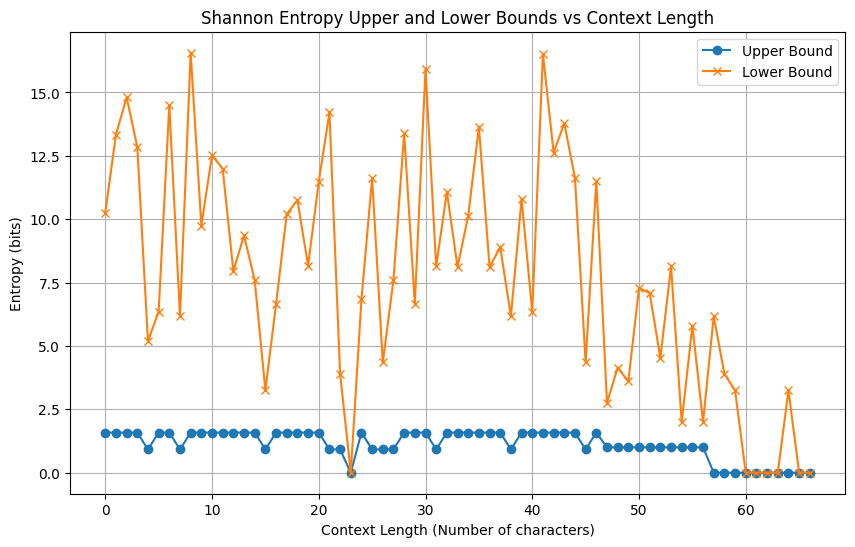

In [13]:
import matplotlib.pyplot as plt

max_len = counts.shape[0]

upper_bounds = []
lower_bounds = []

for N in range(max_len):
    upper_bounds.append(shannon_entropy_upper(counts[N]))
    lower_bounds.append(shannon_lower_bound(counts[N]))

context_lengths = np.arange(max_len)

plt.figure(figsize=(10, 6))
plt.plot(context_lengths, upper_bounds, label='Upper Bound', marker='o')
plt.plot(context_lengths, lower_bounds, label='Lower Bound', marker='x')
plt.xlabel('Context Length (Number of characters)')
plt.ylabel('Entropy (bits)')
plt.title("Shannon Entropy Upper and Lower Bounds vs Context Length")
plt.legend()
plt.grid(True)
plt.show()



## Zipf's Law

Now let's look at some text data directly to see the skewed distribution of tokens predicted by Zipf's Law. Recall that Zipf's law states that a word's rank (from the most common word at rank 1 on down) to its frequency is approximately a constant, i.e., $r \cdot f = k$. Equivalently, we can divide both sides by the total number of tokens $N$ to get $r \cdot P_r = c$, where $c = k/N$ and $P_r = f/N$ is the _relative frequency_ of word $r$.

We start by downloading a sample of 1000 open-access English books from [Project Gutenberg](https://gutenberg.org/).

In [14]:
# If your local environment doesn't have the wget command,
# you can comment this out and download it manually.
!wget "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"

import urllib.request

url = "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"
filename = "pg-sample.json.gz"

urllib.request.urlretrieve(url, filename)
print(f"Downloaded {filename}")


zsh:1: command not found: wget
Downloaded pg-sample.json.gz


The file is compressed with gzip and is in a JSON lines format. Each line is one JSON record, which we parse with the `json` library.

Here we print out the keys in the first record: `id`, `author`, `title`, and `text`.

In [15]:
import gzip, json
for line in gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8"):
  rec = json.loads(line)
  print(rec.keys())
  print(rec['author'])
  print(rec['title'])
  print(rec['text'][0:100])
  break

dict_keys(['id', 'author', 'title', 'text'])
Jefferson, Thomas
The Declaration of Independence of the United States of America


This is a retranscription of one of the first Project
Gutenberg Etexts, offically dated December 3


Your task now is to **tokenize** the text in the `text` field of each record into an array of words. Later on in this course, we will discuss learning better tokenizers. For now, you should separate words on whitespace (space, newline, tab) and punctuation. Convert the tokens to lower case, and keep only those tokens that have at least one letter a-z in them. In general, numerals in text tend not to follow Zipf's law but [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law).

You might use _regular expressions_ (e.g., the `re.split` function) to help with tokenization and filtering.

After you have tokenized, compute $N$, the total number of tokens in the corpus and print it out.

In [16]:
# TODO: Compute an array of tokens in the corpus
# Compute the total number of tokens N and print it out.
import re
text = rec['text']

# Separate words
tokens = re.split(r'[^a-zA-Z0-9]+', text)

# Convert to lowercase
tokens = [token.lower() for token in tokens]

# Filter tokens to keep only those with at least one letter a-z
filtered_tokens = [token for token in tokens if re.search(r'[a-z]', token)]

print(filtered_tokens)

# Calculate the total number of tokens
N = len(filtered_tokens)
print("Total number of tokens in the corpus:", N)

['this', 'is', 'a', 'retranscription', 'of', 'one', 'of', 'the', 'first', 'project', 'gutenberg', 'etexts', 'offically', 'dated', 'december', 'and', 'now', 'officially', 're', 'released', 'on', 'november', 'years', 'after', 'it', 'was', 'spoken', 'we', 'will', 'rerelease', 'the', 'inaugural', 'address', 'of', 'president', 'kennedy', 'officially', 'on', 'november', 'on', 'the', 'day', 'of', 'the', '30th', 'anniversary', 'of', 'his', 'assassination', 'lincoln', 's', 'gettysburg', 'address', 'given', 'november', 'on', 'the', 'battlefield', 'near', 'gettysburg', 'pennsylvania', 'usa', 'four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'upon', 'this', 'continent', 'a', 'new', 'nation', 'conceived', 'in', 'liberty', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', 'now', 'we', 'are', 'engaged', 'in', 'a', 'great', 'civil', 'war', 'testing', 'whether', 'that', 'nation', 'or', 'any', 'nation', 'so', 'conceived'

Now, count the frequency each unigram (distinct word) in the corpus and sort them in an array in descending order of frequency. The first item in your array should be the most common word. Print out that word and its frequency

In [17]:
# TODO: Compute an arrary of unigrams in descending order of frequency.
# Print the most common word and its frequency.
from collections import Counter

# Count frequencies of each unigram
unigram_counts = Counter(filtered_tokens)

# Get the sorted list of unigrams
sorted_unigrams = unigram_counts.most_common()

# Print the most common word and its frequency
most_common_word, most_common_freq = sorted_unigrams[0]
print(f"Most common word: '{most_common_word}' with frequency {most_common_freq}")


Most common word: 'the' with frequency 437


Now, you can look at the Zipf's law relationship between rank and relative frequency (i.e., frequency divided by $N$). Plot the data using a python graphing package such as matplotlib, plotly, or plotnine. This doesn't have to be a fancy graph, so use whatever you're familiar with. Both axes should be on a log scale. If your package doesn't support log scales, you can take the log of the rank and relative frequency yourself before plotting. Recall that since python arrays are zero-indexed, the rank 1 word will be element 0 of your sorted array.

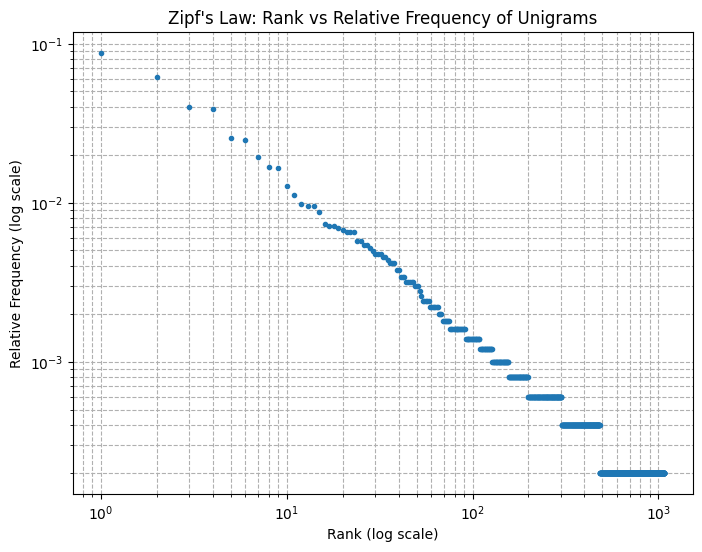

In [18]:
# TODO: Plot rank vs. relative frequency of unigrams.
# Extract frequencies
frequencies = [freq for _, freq in sorted_unigrams]

# Compute ranks
ranks = np.arange(1, len(frequencies) + 1)

# Compute relative frequencies
relative_freq = np.array(frequencies) / N

# Plot rank vs relative frequency on log-log scale
plt.figure(figsize=(8,6))
plt.loglog(ranks, relative_freq, marker='.', linestyle='none')
plt.xlabel('Rank (log scale)')
plt.ylabel('Relative Frequency (log scale)')
plt.title("Zipf's Law: Rank vs Relative Frequency of Unigrams")
plt.grid(True, which="both", ls="--")
plt.show()


Now, take your array of tokens and compute the counts of both the bigrams and trigrams and sort them in descending order of frequency. Print out the most common bigram and trigram.

Most common bigram: ('of', 'the') with frequency 132
Most common trigram: ('the', 'united', 'states') with frequency 56


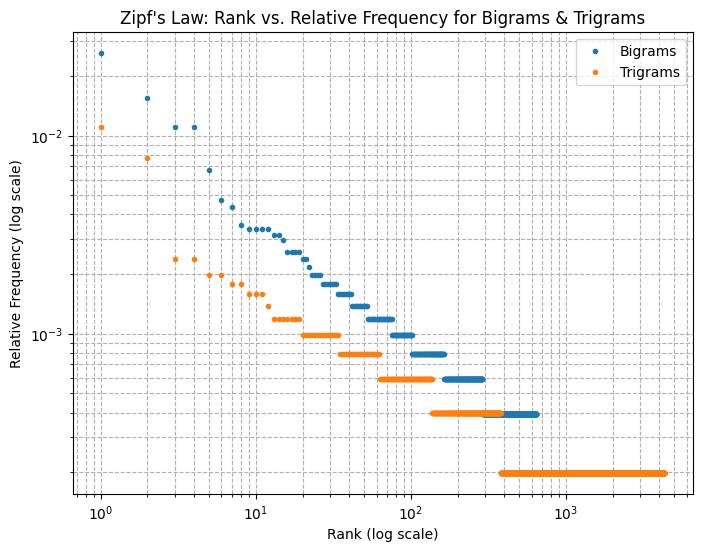

In [19]:
# TODO: Compute sorted bigram and trigram statistics.
# Print out the most common bigram and trigram.
# Plot rank vs. relative frequency for bigrams and trigrams.
# You may make separate plots or put them on the same plot and label them.

# Bigram and trigram creation
bigrams = [tuple(tokens[i:i+2]) for i in range(len(tokens)-1)]
trigrams = [tuple(tokens[i:i+3]) for i in range(len(tokens)-2)]

# Counting
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Sorting
sorted_bigrams = bigram_counts.most_common()
sorted_trigrams = trigram_counts.most_common()

# Print most common bigram and trigram
print(f"Most common bigram: {sorted_bigrams[0][0]} with frequency {sorted_bigrams[0][1]}")
print(f"Most common trigram: {sorted_trigrams[0][0]} with frequency {sorted_trigrams[0][1]}")

# Prepare data for plotting
bigram_freqs = [freq for _, freq in sorted_bigrams]
trigram_freqs = [freq for _, freq in sorted_trigrams]

bigram_ranks = np.arange(1, len(bigram_freqs)+1)
trigram_ranks = np.arange(1, len(trigram_freqs)+1)

N_bigram = sum(bigram_freqs)
N_trigram = sum(trigram_freqs)

bigram_rel_freqs = np.array(bigram_freqs) / N_bigram
trigram_rel_freqs = np.array(trigram_freqs) / N_trigram

# Plotting
plt.figure(figsize=(8, 6))
plt.loglog(bigram_ranks, bigram_rel_freqs, marker='.', linestyle='none', label='Bigrams')
plt.loglog(trigram_ranks, trigram_rel_freqs, marker='.', linestyle='none', label='Trigrams')
plt.xlabel('Rank (log scale)')
plt.ylabel('Relative Frequency (log scale)')
plt.title("Zipf's Law: Rank vs. Relative Frequency for Bigrams & Trigrams")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()



**TODO**: Finally, write your visual impressions of the fit of the unigram, bigram, and trigram distributions. This doesn't need to be statistically rigorous.

**Unigram**: The unigram distribution forms a nearly straight line on the log-log plot, closely following Zipf’s law. When I list words from the most common to the least common, the chance of seeing each word gets smaller in a smooth and regular way. The most common word appears a lot, the second one appears about half as much, the third one appears about one-third as much, and so on. This creates a pattern where word frequency drops quickly but in a regular, predictable way.

**Bigram**: The bigram distribution also follows a Zipf's law, with a steep initial drop and a longer tail than the unigram plot, but the curve is shorter and the slope slightly steeper than the unigram one. This means that frequent bigrams are rarer and their occurrence probabilities drop faster compared to single words. The data presents some horizontal lines, reflecting many bigrams sharing the same frequency. The bigrams are rarer, the horizontal lines are longer.

**Trigram**: The trigram distribution has the steepest decline, emphasizing that three-word sequences are even less likely to appear frequently. The plot shows some longer horizontal areas than bigram plot near the bottom, which means many trigrams appear just fewer times than bigrams. Even so, the overall pattern predicted by Zipf’s law is still clear.